<a href="https://colab.research.google.com/github/Rachhh53/Digit-Recognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.cm as cm
import seaborn as sns
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
!wget https://github.com/Rachhh53/Digit-Recognizer/archive/refs/heads/main.zip

--2022-02-14 00:25:00--  https://github.com/Rachhh53/Digit-Recognizer/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Rachhh53/Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-14 00:25:00--  https://codeload.github.com/Rachhh53/Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [     <=>            ]  15.48M  17.1MB/s    in 0.9s    

2022-02-14 00:25:01 (17.1 MB/s) - ‘main.zip’ saved [16234243]



In [3]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
d2a2091dc33f2ad75e3c8bf0db51d3a19b6a1687
   creating: /content/output_folder/Digit-Recognizer-main/
  inflating: /content/output_folder/Digit-Recognizer-main/DigitRecognizer.ipynb  
 extracting: /content/output_folder/Digit-Recognizer-main/README.md  
 extracting: /content/output_folder/Digit-Recognizer-main/test.csv.zip  
 extracting: /content/output_folder/Digit-Recognizer-main/train.csv.zip  


In [4]:
!unzip "/content/output_folder/Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/test.csv.zip
  inflating: /content/output_folder/Digit-Recognizer-main/csvs/test.csv  


In [5]:
!unzip "/content/output_folder/Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/train.csv.zip
  inflating: /content/output_folder/Digit-Recognizer-main/csvs/train.csv  


In [6]:
df_test = pd.read_csv('/content/output_folder/Digit-Recognizer-main/csvs/test.csv')

In [7]:
df_train = pd.read_csv('/content/output_folder/Digit-Recognizer-main/csvs/train.csv')

In [8]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
for col in df_test.columns:
  print(col)

pixel0
pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel12
pixel13
pixel14
pixel15
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel32
pixel33
pixel34
pixel35
pixel36
pixel37
pixel38
pixel39
pixel40
pixel41
pixel42
pixel43
pixel44
pixel45
pixel46
pixel47
pixel48
pixel49
pixel50
pixel51
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel58
pixel59
pixel60
pixel61
pixel62
pixel63
pixel64
pixel65
pixel66
pixel67
pixel68
pixel69
pixel70
pixel71
pixel72
pixel73
pixel74
pixel75
pixel76
pixel77
pixel78
pixel79
pixel80
pixel81
pixel82
pixel83
pixel84
pixel85
pixel86
pixel87
pixel88
pixel89
pixel90
pixel91
pixel92
pixel93
pixel94
pixel95
pixel96
pixel97
pixel98
pixel99
pixel100
pixel101
pixel102
pixel103
pixel104
pixel105
pixel106
pixel107
pixel108
pixel109
pixel110
pixel111
pixel112
pixel113
pixel114
pixel115
pixel116
pixel117
pixel118
pixel119
pixel120
pixel121
pixel122
pix

# EDA

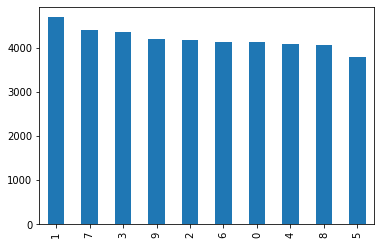

In [11]:
# Training data insights
df_train['label'].value_counts().plot.bar()

Class 1 has the most observations

## Random Forest Classifier

Requirement 1 - Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).

In [12]:
y = df_train['label']
X = df_train.drop(['label'], axis=1)

In [13]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
rfc_y_pred=rfc.predict(df_test)

Requirement 2 - Record the time it takes to fit the model and then evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID

Model completed in 32 seconds

Submission:

In [14]:
# ImageId is not in the dataset so I used a 1 index
output = pd.DataFrame({'ImageId': (df_test.index + 1),
                       'Label': rfc_y_pred})
output.to_csv('submission1.csv', index=False)
files.download('submission1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Score: 0.96592

An alternative to the above <br>
https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/

Input Shape: (28140, 784)
Accuracy: 96.30%

[[1317    0    2    1    2    1    5    0    5    0]
 [   1 1504    3    2    1    3    3    1    1    1]
 [   5    3 1359    5   14    2    5   10   11    0]
 [   5    1   12 1390    3   18    3   15   15    9]
 [   3    0    3    0 1313    1    8    1    2   27]
 [   7    4    3   18    0 1142   12    2    8    9]
 [  12    2    1    0    3    8 1364    0    7    0]
 [   1    8   19    2    8    0    0 1415    4   23]
 [   2    5    6   13    6    9    6    4 1271   12]
 [   5    5    5   21   14    4    2   11    9 1272]]


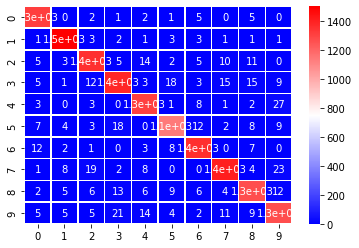

In [15]:
def fit_random_forest_classifier(X, y, print_output=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.33, 
                                                        random_state=42)

    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    acc = accuracy_score(y_test, y_preds)
    
    if print_output == True:
        mat = confusion_matrix(y_test, y_preds)
        sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5)

        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:2.2%}\n'.format(acc))
        print(mat)
    
    return acc
fit_random_forest_classifier(X, y);

## PCA

Requirement 3 - Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.

In [16]:
# create a single dataframe
dataframes = [df_train, df_test]
df = pd.concat(dataframes)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df.shape

(70000, 785)

In [18]:
df_test.shape

(28000, 784)

In [19]:
df_train.shape

(42000, 785)

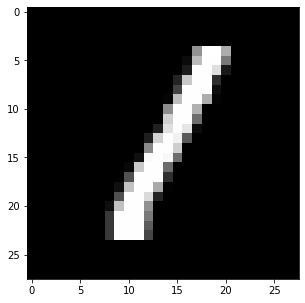

12116    1.0
12116    NaN
Name: label, dtype: float64


In [20]:
# extracting label from dataset
label = df['label']
df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 20000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/

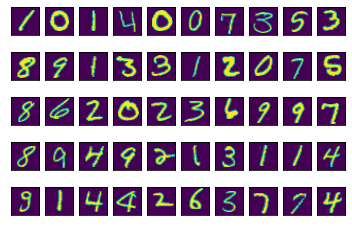

In [21]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

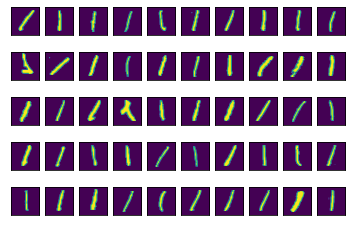

In [22]:
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50): 
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X.iloc[indices[0][digit_num]].values.reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit(1)

Standardize the data

In [23]:
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape

(70000, 784)

In [24]:
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

Try 2 principal components first

Input Shape: (28140, 2)
Accuracy: 32.48%

[[ 821    0  190   41   35   45  145    6   39   11]
 [   2 1288    2   13   23   38   18   51   36   49]
 [ 216    4  304  202  136  124  203   57  110   58]
 [  80   25  204  219  140  183  169  147  183  121]
 [  50   60  123  161  223  115  126  172  126  202]
 [  65   23  131  125  139  229  197   46  192   58]
 [ 203   30  208  153  110  197  293   36  132   35]
 [   7   85   61  102  182   70   36  527   79  331]
 [  49   53  129  163  138  213  158   86  230  115]
 [  16  116   61   98  196   65   55  297   76  368]]


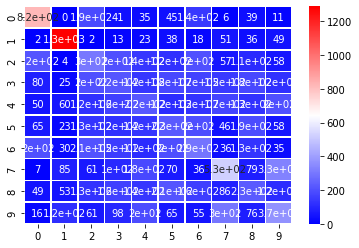

In [25]:
pca, X_pca = do_pca(2, X)
fit_random_forest_classifier(X_pca, y);

2 principal components is not enough - accuracy less than 33%

plot the data in a 2 dimensional space to view separation.

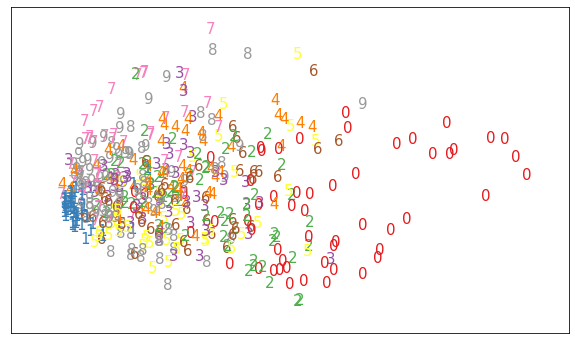

In [26]:
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
plot_components(X_pca[:500], y[:500])

How many principal components would be required in order to reach a reasonable accuracy?

In [27]:
acc_list, pc_list = [], []
for pc in range(2,101):
    print(pc)
    pca, X_pca = do_pca(pc, X)
    acc = fit_random_forest_classifier(X_pca, y, print_output=False);
    acc_list.append(acc)
    pc_list.append(pc)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


This took 48 minutes to complete

Requirement 4 - Record the time it takes to identify the principal components.

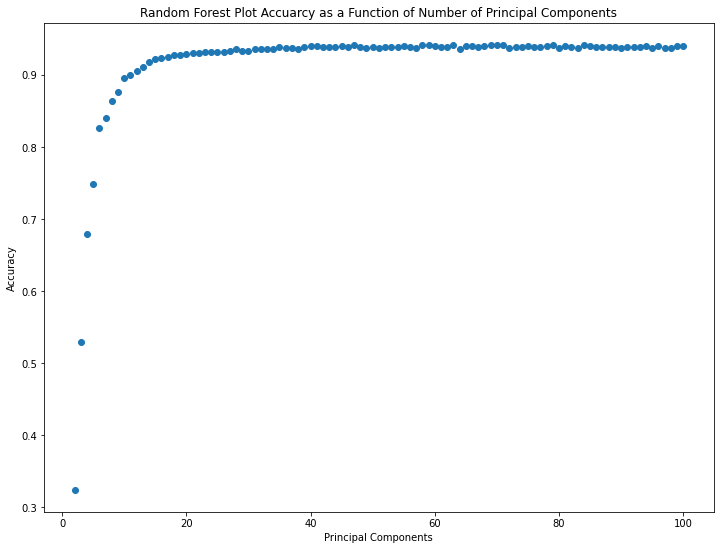

In [28]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Random Forest Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

It looks like the elbow is right around 20 principal components so anything above that would have diminishing returns.

In [29]:
np.max(acc_list), pc_list[np.where(acc_list == np.max(acc_list))[0][0]]

(0.9417027417027417, 58)

Maximum accuracy is 94.2% with 65 principal components.

Requirement 5 - Using the identified principal components from step (2), use thecsvto build another random forest classifier.

In [30]:
# fit PCA with 15 components
pca, X_pca = do_pca(15, X)

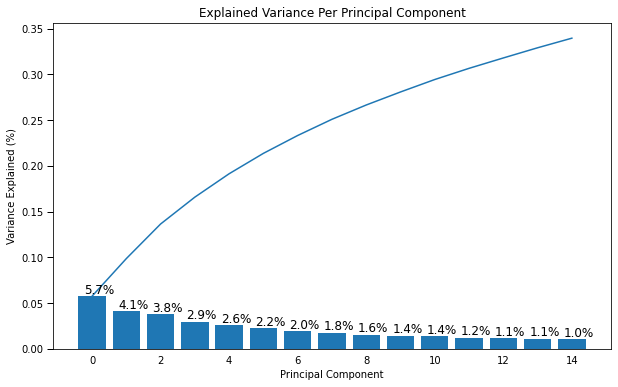

In [31]:
# plots the amount of variance explained by each component.
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

Each bar represents the variability explained by each principal component. <br>
Note: the first component will ALWAYS have the most amount of variability explained<br>
By reviewing only the top 15 components - those alone explain 34% of the variance.

Looking at the shape of components shows us that each component gives the weights for each pixel:

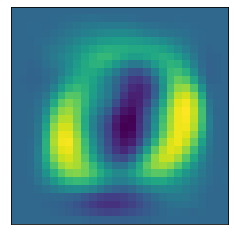

In [32]:
# what pixel patterns are most important to predicting a given number. The bright yellow pixels are heavily weighted and the darker blue pixels are lighter weight.
def plot_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
plot_component(pca, 0)

# Modelling

## Random Forest with PCA

Requirement 6 - Record the time it takes to fit the model and to evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

****I am doing it this way only to satisfy the requirements of this assingment. In real life I would never combine the datasets in order to do PCA as this exposes our training data to the testing data****

In [33]:
y = df_train['label']
X = df_train.drop(['label'], axis=1)

Input Shape: (28140, 65)
Accuracy: 93.97%

[[1303    0    3    2    2    5   15    0    3    0]
 [   1 1494    6    5    1    1    5    1    4    2]
 [  12    1 1338   17    5    1    5    8   23    4]
 [   3    1   21 1348    2   28    4   25   30    9]
 [   1    5   13    0 1280    2    9    2    5   41]
 [  12    1    4   43    2 1095   20    2   11   15]
 [  14    1    5    0    4   16 1351    0    6    0]
 [   3   14   19    6   10    1    0 1380    2   45]
 [   5    5   12   36   12   20    6    4 1224   10]
 [   8    2    9   26   41    1    0   41    9 1211]]


0.9396825396825397

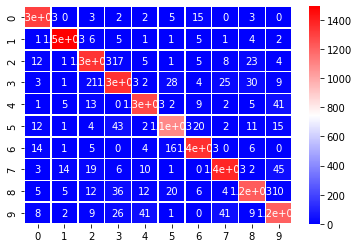

In [34]:
# pca with 65 components
pca, X_pca = do_pca(65, X)
fit_random_forest_classifier(X_pca, y)

In [35]:
pca_test, X_pca_test = do_pca(65, df_test)

In [36]:
rfc2=RandomForestClassifier(n_estimators=100)
rfc2.fit(X_pca,y)
rfc_y_pred2=rfc2.predict(X_pca_test)

In [37]:
# ImageId is not in the dataset so I used a 1 index
output = pd.DataFrame({'ImageId': (df_test.index + 1),
                       'Label': rfc_y_pred2})
output.to_csv('submission2.csv', index=False)
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Score: 0.79867

In [38]:
target = df_train['label']
# Drop the label feature
df_train.drop("label",axis=1,inplace=True)

In [39]:
X_=df_train
X_std_=StandardScaler().fit_transform(X_)
pca_=PCA(153)
X_140d=pca_.fit_transform(X_std_)
Target=target

In [40]:
eigenvectors_=pca_.components_
print(eigenvectors_.shape)

(153, 784)


In [41]:
trace = go.Scatter(
    x = X_140d[:,0],
    y = X_140d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

## KMeans Clustering

Requirement 7 - Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 

In [42]:
df_train_scale = StandardScaler().fit_transform(X)
df_test_scale = StandardScaler().fit_transform(df_test)

In [43]:
k = 10
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df_train_scale)

In [44]:
y_pred

array([2, 0, 2, ..., 8, 5, 3], dtype=int32)

In [45]:
y_pred is kmeans.labels_

True

In [46]:
kmeans.labels_

array([2, 0, 2, ..., 8, 5, 3], dtype=int32)

And the following 10 centroids (i.e., cluster centers) were estimated:

In [47]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
kmeans_y_pred = kmeans.predict(df_test_scale)

In [49]:
output = pd.DataFrame({'ImageId': (df_test.index + 1),
                       'Label': kmeans_y_pred})
output.to_csv('submission3.csv', index=False)
files.download('submission3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Score: 0.11014

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [50]:
kmeans.inertia_

25070150.83226007

Find the ideal number of clusters

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

### Elbow Method

In [51]:
range_n_clusters = [10, 16, 64, 144, 250]
avg_distance=[]
for n_clusters in range_n_clusters:
  print(n_clusters)
  clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(df_train_scale)
  avg_distance.append(clusterer.inertia_)

10
16
64
144
250


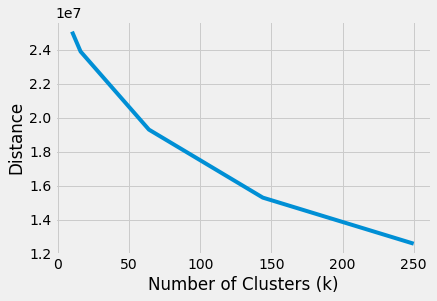

In [52]:
style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

I don't really see an elbow here...maybe I needed more clusters

# Conclusions

The model with the best performance here was the original Random Forest Classifier. I don't feel clustering is the right method for this dataset and PCA loses a lot of explainability.